# Machine Learning - Clustering

### This script contains the following:
#### 1. Importing Libraries and Data
#### 2. Data Cleaning
#### 3. Standardisation
#### 4. The Elbow Technique
#### 5. K-Mean clustering

### 1. Importing Libraries and Data

In [4]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import os
import sklearn
from sklearn.cluster import KMeans 
from sklearn.preprocessing import StandardScaler
import pylab as pl 

In [5]:
# This option ensures the graphs you create are displayed in your notebook without the need to "call" them specifically.

%matplotlib inline

In [6]:
path = r'C:\Users\mosh_\OneDrive\Desktop\Career Foundry\Data Immersion\Achievement 6 - Advanced Analytics and Dashbooard Design'

In [7]:
path

'C:\\Users\\mosh_\\OneDrive\\Desktop\\Career Foundry\\Data Immersion\\Achievement 6 - Advanced Analytics and Dashbooard Design'

In [12]:
happy = pd.read_pickle(os.path.join(path, 'data', 'happy_cleaned.pkl'))

### 2. Data Cleaning

In [15]:
happy.shape

(156, 9)

In [17]:
happy.head()

,Overall rank,Country or region,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
0,1,Finland,7.769,1.340,1.587,0.986,0.596,0.153,0.393
1,2,Denmark,7.600,1.383,1.573,0.996,0.592,0.252,0.410
2,3,Norway,7.554,1.488,1.582,1.028,0.603,0.271,0.341
3,4,Iceland,7.494,1.380,1.624,1.026,0.591,0.354,0.118
4,5,Netherlands,7.488,1.396,1.522,0.999,0.557,0.322,0.298


In [19]:
happy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 156 entries, 0 to 155
Data columns (total 9 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Overall rank                  156 non-null    int64  
 1   Country or region             156 non-null    object 
 2   Score                         156 non-null    float64
 3   GDP per capita                156 non-null    float64
 4   Social support                156 non-null    float64
 5   Healthy life expectancy       156 non-null    float64
 6   Freedom to make life choices  156 non-null    float64
 7   Generosity                    156 non-null    float64
 8   Perceptions of corruption     156 non-null    float64
dtypes: float64(7), int64(1), object(1)
memory usage: 11.1+ KB


In [21]:
# removong colums with categorical data and non numerical data

happy_drop = happy.drop(columns=['Overall rank','Country or region'])

In [23]:
happy_drop.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 156 entries, 0 to 155
Data columns (total 7 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Score                         156 non-null    float64
 1   GDP per capita                156 non-null    float64
 2   Social support                156 non-null    float64
 3   Healthy life expectancy       156 non-null    float64
 4   Freedom to make life choices  156 non-null    float64
 5   Generosity                    156 non-null    float64
 6   Perceptions of corruption     156 non-null    float64
dtypes: float64(7)
memory usage: 8.7 KB


### 3. Standardisation

In [26]:
# Define a standard scaler object

scaler = StandardScaler()
scaled_data = scaler.fit_transform(happy_drop)

In [28]:
scaled_data

array([[ 2.12871112,  1.09504166,  1.26809758, ...,  1.4242823 ,
        -0.33540398,  2.99675712],
       [ 1.97639663,  1.20332385,  1.22115409, ...,  1.39627687,
         0.70726491,  3.17715844],
       [ 1.93493825,  1.46773387,  1.25133205, ...,  1.47329179,
         0.90737308,  2.4449413 ],
       ...,
       [-1.98648391, -1.39796708, -2.31972634, ..., -2.74852598,
        -0.28274393, -0.90840093],
       [-2.09463621, -2.21386084, -4.05328238, ..., -1.17322084,
         0.52822076, -0.8022825 ],
       [-2.30192812, -1.50876747, -2.12524617, ..., -2.67851242,
         0.18066446, -0.20801932]])

### 4. The Elbow Technique

In [31]:
num_cl = range(1, 10) # Defines the range of potential clusters in the data.
kmeans = [KMeans(n_clusters=i) for i in num_cl] # Defines k-means clusters in the range assigned above.

In [33]:
# Creates a score that represents a rate of variation for the given cluster option.

score = [kmeans[i].fit(scaled_data).score(scaled_data) for i in range(len(kmeans))] 

score

C:\Users\mosh_\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\mosh_\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\mosh_\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\mosh_\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Window

[-1092.0,
 -686.4931989864399,
 -495.71234639799786,
 -436.2295004539892,
 -378.82762754888614,
 -359.58540822061457,
 -346.5922926326928,
 -309.40204867839225,
 -287.95748582727845]

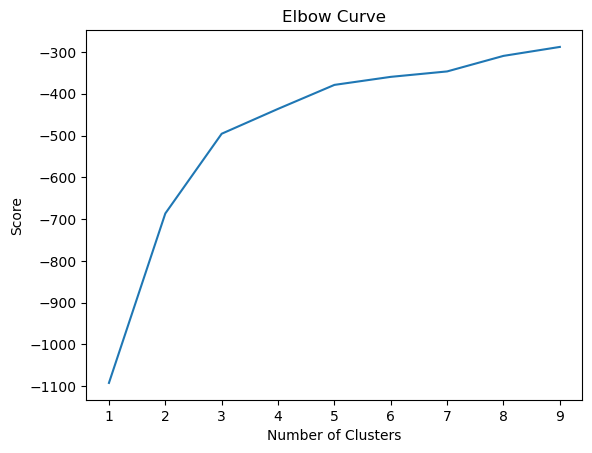

In [35]:
pl.plot(num_cl,score)
pl.xlabel('Number of Clusters')
pl.ylabel('Score')
pl.title('Elbow Curve')
pl.show()

Looking at the Elbow Technique, the number of clusters we can create is 3

### 5. K-Mean clustering

In [39]:
# Create the k-means object.

kmeans = KMeans(n_clusters = 3) 


In [41]:
# Fit the k-means object to the data.

kmeans.fit(scaled_data)

C:\Users\mosh_\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


KMeans(n_clusters=3)

In [43]:
happy_drop['clusters'] = kmeans.fit_predict(happy_drop)

C:\Users\mosh_\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


In [45]:
happy_drop.head()

,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,clusters
0,7.769,1.340,1.587,0.986,0.596,0.153,0.393,1
1,7.600,1.383,1.573,0.996,0.592,0.252,0.410,1
2,7.554,1.488,1.582,1.028,0.603,0.271,0.341,1
3,7.494,1.380,1.624,1.026,0.591,0.354,0.118,1
4,7.488,1.396,1.522,0.999,0.557,0.322,0.298,1


In [47]:
happy_drop['clusters'].value_counts()

clusters
0    67
2    59
1    30
Name: count, dtype: int64

<Figure size 640x480 with 0 Axes>

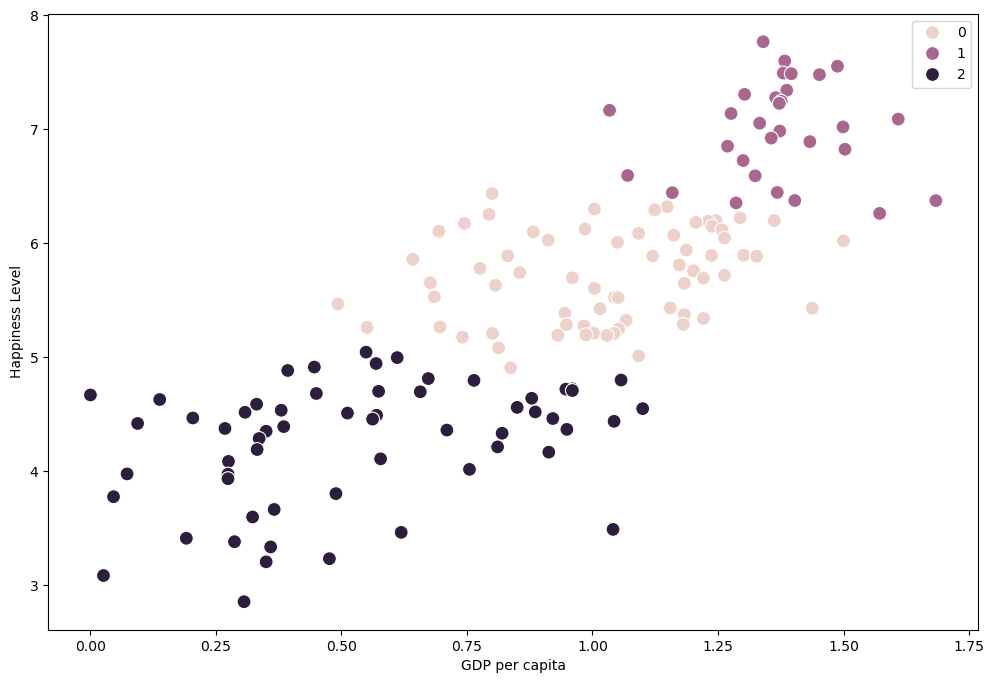

In [70]:
# Plot the clusters for the "n_guns_involved" and "total_affected" variables.

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=happy_drop['GDP per capita'], y=happy_drop['Score'], hue=kmeans.labels_, s=100) 

ax.grid(False) # This removes the grid from the background.
plt.xlabel('GDP per capita') # Label x-axis.
plt.ylabel('Happiness Level') # Label y-axis.
plt.show()
plt.tight_layout()
plt.savefig('GDP_cluster', dpi=300, bbox_inches='tight')

**Insight**
<BR>
<BR>  purple  - This cluster mainly represents the countries with highest GPD per capita, These countries are also have the highest happiness levels, none of the countries are below score of 6 on the happiness level.
<BR>
<BR> Light Purple - This cluster is both with in the middle of the happiness level and GDP per capita.
<BR>
<BR> Dark Purple - The lowest GDP per capita is spend within this cluster, which is also linked with the lowest levels of happiness. 
<BR>
<BR> Interesting all 3 clusters have countries which fall under similar criterias, looking between 0.75 and 1.00 for GDP per capita as well as 5 and 6 for happiness levels, this will potentially need more analysis
<BR>

<Figure size 640x480 with 0 Axes>

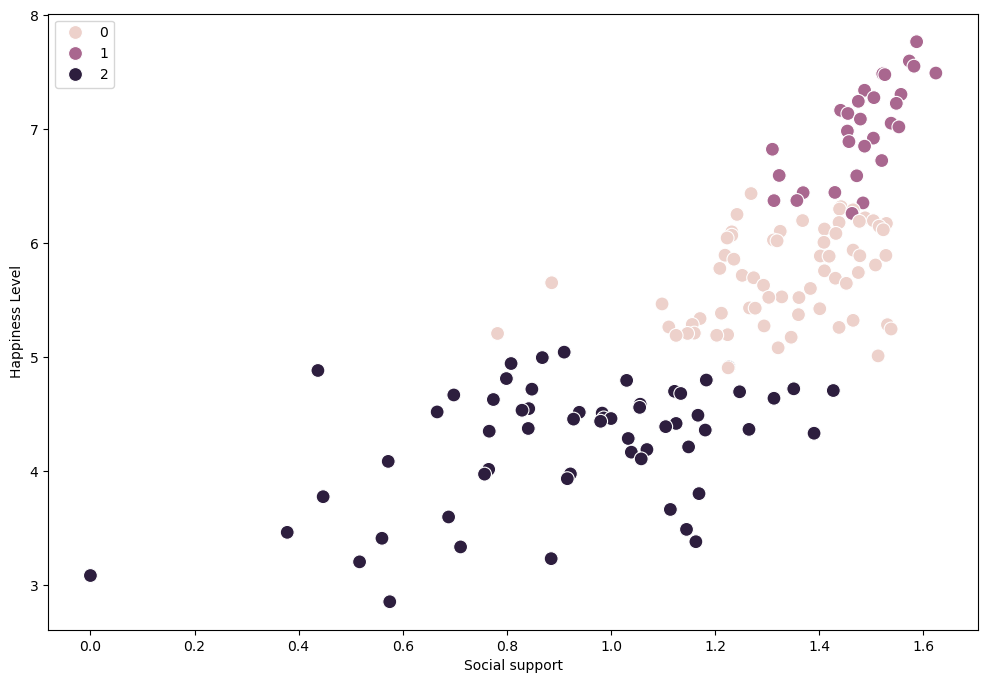

In [58]:
plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=happy_drop['Social support'], y=happy_drop['Score'], hue=kmeans.labels_, s=100) 

ax.grid(False) # This removes the grid from the background.
plt.xlabel('Social support') # Label x-axis.
plt.ylabel('Happiness Level') # Label y-axis.
plt.show()
plt.tight_layout()
plt.savefig('Social_cluster', dpi=300, bbox_inches='tight')

**Insight**
<BR>
<BR> Purple - This cluster is represented by the countries which provide the most social support, which all fall within the highest levels of happiness. What we needs to be taken into consideration is how close the the cluster is grouped together. unlike the other two clusters which are more scattered, the light purple is concentrated together in the top left. 
<BR>
<BR> Light Purple - The majority of this cluster has similar levels of social support to light purple, however have a lower level of happiness. We also need to consider there are a few outliers within the cluster who provide less social support and but still maintain a similar happiness level.
<BR>
<BR> Dark Purple - This cluster is respresenting the lower levels of happiness within the scatterplot. Again there doesn't seem to be any real pattern with the how much social support is provided by a country. The countries are all spread across the scatterplot, We do need to take into consideration there are quite a few countries within the lowest level of social support. 
<BR>
<BR> This indicate other factors play a huge role in how happy a nation is. While social support is important and does affect happiness (the highest point of social support level are all in the highest happiness level), the above provide evidence multiple different influences have an effect on happiness, not just social support.

<Figure size 640x480 with 0 Axes>

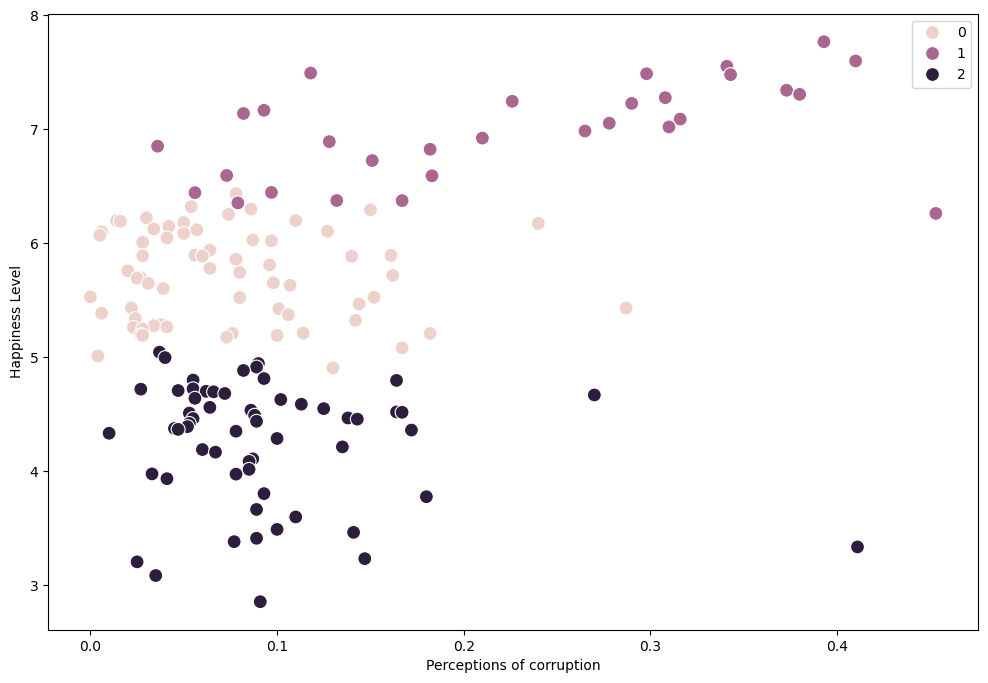

In [67]:
plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=happy_drop['Perceptions of corruption'], y=happy_drop['Score'], hue=kmeans.labels_, s=100) 

ax.grid(False) # This removes the grid from the background.
plt.xlabel('Perceptions of corruption') # Label x-axis.
plt.ylabel('Happiness Level') # Label y-axis.
plt.show()
plt.tight_layout()
plt.savefig('corruption_cluster', dpi=300, bbox_inches='tight')

**Insight** 
<BR>
<BR> Purple - Very interesting cluster, While majority of countries fall under low perception of corruptions and have a hight level of happiness, The countries on the top end of the happiness levels also have a higher perception of corruption, Additional analysis need to be conducted to investigate this. Potentially, other factors are contributing to this. 
<BR> 
<BR> Dark Purple & Light  Purple - Both of these clusters have similar levels of perception of corruption however the happiness levels differ drastically.

In [77]:
happy_drop.loc[happy_drop['clusters'] == 2, 'cluster'] = 'Dark purple'
happy_drop.loc[happy_drop['clusters'] == 1, 'cluster'] = 'purple'
happy_drop.loc[happy_drop['clusters'] == 0, 'cluster'] = 'light purple'

In [79]:
happy_drop.columns.tolist()

['Score',
 'GDP per capita',
 'Social support',
 'Healthy life expectancy',
 'Freedom to make life choices',
 'Generosity',
 'Perceptions of corruption',
 'clusters',
 'cluster']

In [81]:
happy_drop.groupby('cluster').agg({'Score':['mean', 'median'], 
                                    'GDP per capita':['mean', 'median'],
                                    'Social support':['mean', 'median'],
                                    'Healthy life expectancy':['mean', 'median'],
                                   'Freedom to make life choices':['mean', 'median'],
                                   'Generosity':['mean', 'median'],
                                   'Perceptions of corruption':['mean', 'median'],
                                  })

Score         GDP per capita         Social support          \
                  mean  median           mean  median           mean  median   
cluster                                                                        
Dark purple   4.258322  4.4180       0.531695  0.4890       0.930695  0.9800   
light purple  5.706910  5.7180       1.025970  1.0440       1.332373  1.3460   
purple        6.996767  7.0375       1.369767  1.3725       1.479833  1.4855   

             Healthy life expectancy        Freedom to make life choices  \
                                mean median                         mean   
cluster                                                                    
Dark purple                 0.491678  0.486                     0.320169   
light purple                0.816672  0.818                     0.403836   
purple                      0.980400  0.999                     0.509800   

                     Generosity        Perceptions of corruption         
              median       mean median                      mean median  
cluster                                                                  
Dark purple   0.3440   0.191136  0.187                  0.093356  0.085  
light purple  0.4350   0.157000  0.137                  0.074254  0.060  
purple        0.5435   0.234667  0.261                  0.225700  0.218